In [1]:
# Loading all the libraries
import pandas as pd
import plotly_express as px
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np


In [2]:
data = pd.read_csv('../vehicles_us.csv',parse_dates=['date_posted'])

In [3]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     46265 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        25572 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


In [5]:
data.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [6]:
# Replace null value for is_4wd with 0 since the is_4wd field is a binary field
data['is_4wd'] = data['is_4wd'].fillna(0)

In [7]:
data['model'].unique()



array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'subaru imp

In [8]:
# Extracting company name from model name

data['company'] = data['model'].str.split().str[0]

In [9]:
data['company'].unique()

array(['bmw', 'ford', 'hyundai', 'chrysler', 'toyota', 'honda', 'kia',
       'chevrolet', 'ram', 'gmc', 'jeep', 'nissan', 'subaru', 'dodge',
       'mercedes-benz', 'acura', 'cadillac', 'volkswagen', 'buick'],
      dtype=object)

In [10]:
data['type'].value_counts()

type
SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: count, dtype: int64

In [11]:
data.groupby('condition')['company'].value_counts()

condition  company   
excellent  ford          5762
           chevrolet     4820
           toyota        2763
           honda         1751
           ram           1688
                         ... 
salvage    dodge            4
           hyundai          4
           gmc              3
           cadillac         1
           volkswagen       1
Name: count, Length: 99, dtype: int64

In [12]:
print(data['condition'].unique())

['good' 'like new' 'fair' 'excellent' 'salvage' 'new']


In [13]:
data['condition'] = data['condition'].str.lower().str.strip()

In [14]:
data.groupby('condition')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
excellent,24773.0,12806.669842,9571.617451,1.0,5999.0,10495.0,16995.00,300000.0
fair,1607.0,3386.502178,4308.814660,1.0,1500.0,2500.0,4000.00,123456.0
good,20145.0,10877.439067,9533.312223,1.0,4500.0,7900.0,14995.00,375000.0
like new,4742.0,16677.445593,12154.650272,1.0,7162.5,13995.0,23799.25,145000.0
new,143.0,26050.300699,21028.831965,1.0,8300.0,21999.0,38607.00,109999.0
salvage,115.0,4242.295652,4686.620046,400.0,1000.0,2500.0,5100.00,22000.0


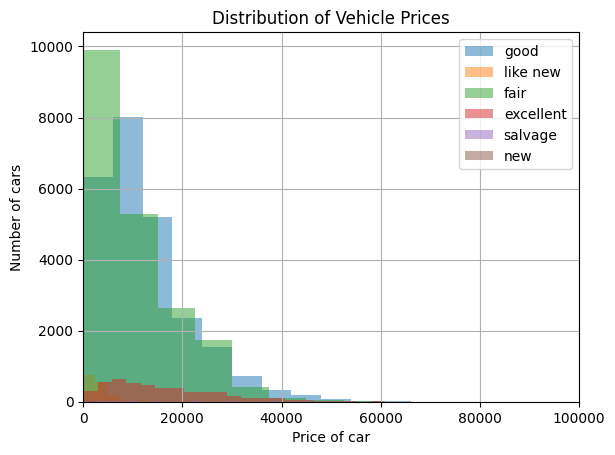

In [15]:
hist_data = data.groupby('condition')['price'].hist(alpha=0.5, bins=50)

# Set up the legend ensuring no duplicates
plt.legend(['good', 'like new', 'fair', 'excellent', 'salvage' ,'new'])
plt.xlim(0, 100000)
plt.xlabel('Price of car')
plt.ylabel('Number of cars')
plt.title('Distribution of Vehicle Prices')
plt.show()

In [20]:
# Create a histogram
fig = px.histogram(data, x='price', color='condition',
                   title='Distribution of Vehicle Prices',
                   labels={'price': 'Vehicle Price'}, # can specify one label per df column
                   opacity=0.8,
                   
                     category_orders={'condition': ['new', 'like new', 'good', 'fair', 'salvage', 'excellent']}   # customize color of histogram bars
                   )

# Update layout
fig.update_layout(bargap=0.2)  # Gap between bars

# Show plot
fig.show()

C:\Users\ayush\AppData\Local\Temp\ipykernel_5208\3735477737.py:2: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



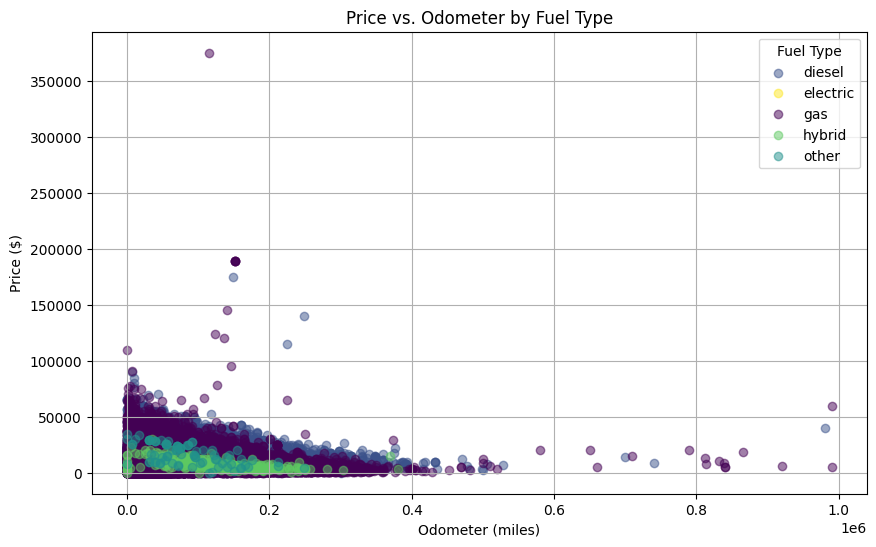

In [17]:
unique_fuel_types = data['fuel'].unique()
colors = plt.cm.get_cmap('viridis', len(unique_fuel_types))
fuel_color_map = {fuel: colors(i) for i, fuel in enumerate(unique_fuel_types)}

plt.figure(figsize=(10, 6))
for fuel, group in data.groupby('fuel'):
    plt.scatter(group['odometer'], group['price'], alpha=0.5, label=fuel, color=fuel_color_map[fuel])

plt.title('Price vs. Odometer by Fuel Type')
plt.xlabel('Odometer (miles)')
plt.ylabel('Price ($)')
plt.legend(title='Fuel Type')
plt.grid(True)

plt.show()

In [21]:
fig2 = px.scatter(data, x='odometer', y='price', color='fuel', 
                 title='Price vs. Odometer by Fuel Type', 
                 labels={'odometer': 'Odometer (miles)', 'price': 'Price ($)'}, 
                 opacity=0.5)

fig2.show()